In [1]:
from cv2 import VideoCapture
import cv2

In [2]:
%matplotlib inline
from pylab import imshow

this VideoCapture line might take a bit the first time you run it.

In [19]:
_cam = VideoCapture(0)
_cam.set(cv2.CAP_PROP_BRIGHTNESS, 1000)
_cam.set(3, 1600)
_cam.set(4, 900)

True

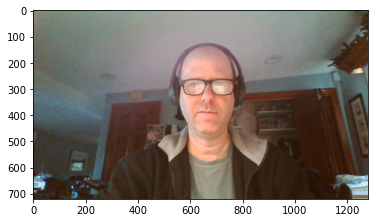

In [21]:
result, image = _cam.read()
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow(image)

In [3]:
_cam = VideoCapture(1)  # may need to select 0, 1, or 2 for the external camera

In [4]:
_cam.set(cv2.CAP_PROP_BRIGHTNESS, 1000)
_cam.set(3, 1600)
_cam.set(4, 900)

True

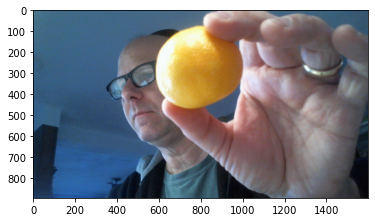

In [6]:
result, image = _cam.read()
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow(image)

In [7]:
def take_picture(filename='picture.jpg',view=False):
    global _cam
    from cv2 import VideoCapture
    import cv2    
    from pylab import imshow
    
    try:
        _cam==None
    except NameError:
        _cam = VideoCapture(1)
        
    
    result, image = _cam.read()
    
    
    if view:
        imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))        
        
    print("Saving ",filename)
    cv2.imwrite(filename,image)
    
    


Saving  picture.jpg


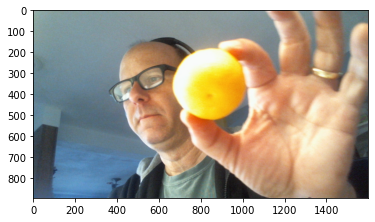

In [8]:
take_picture(view=True)

## Copy the file to the robot

In [9]:
def scp(local,user_hostname,remote):
    global passwd_
    
    import os,shutil
    assert os.name=='nt'  # only works on windows
    assert shutil.which('pscp')
    
    assert '@' in user_hostname
    cmd='pscp -pw "%s" "%s" %s:"%s"' % (passwd_,local,user_hostname,remote)
    cmd_='pscp -pw "%s" "%s" %s:"%s"' % ('*'*len(passwd_),local,user_hostname,remote)
    print(cmd_)
    os.system(cmd)

In [10]:
from getpass import getpass

In [7]:
passwd_=getpass("Enter password:")

Enter password: ··········


In [10]:
scp('picture.jpg','pi@10.2.2.30','python/picture.jpg')

pscp -pw ********** 'picture.jpg' pi@10.2.2.30:'python/picture.jpg'
